**1. Explain the explore vs exploit tradeoff with examples.**

In the context of reinforcement learning, the explore-exploit tradeoff refers to the dilemma of choosing between trying out new actions or strategies to learn more about the environment and exploiting the actions or strategies that have led to the highest rewards in the past.

Exploration in reinforcement learning involves taking actions that may not have been tried before or have low probability of being optimal based on the current policy. Exploration is essential to discovering better strategies and learning more about the environment.

Exploitation, on the other hand, involves taking actions that have previously led to the highest rewards and are expected to continue to do so in the future. Exploitation is important for maximizing the cumulative reward obtained by the agent.
	
Example is in the context of training an autonomous vehicle to navigate a new environment. Exploration involves taking actions that may not have been tried before to learn more about the environment, such as exploring a new route or testing the vehicle's limits in a safe manner. Exploitation involves taking actions that have been successful in the past, such as following a previously learned route or driving at a safe and consistent speed.
	
In general, the explore-exploit tradeoff is a critical concept in reinforcement learning, and finding the right balance between exploration and exploitation is important for optimizing the performance of the agent in the long term.


**2. How would a finite or infinite horizon affect our algorithms?**

In the context of reinforcement learning, the concept of horizon refers to the number of time steps over which the agent's decision-making process extends. The horizon can be either finite or infinite, and it can have a significant impact on the algorithms used for learning.

A finite horizon means that the agent's decision-making process is limited to a fixed number of time steps. In this case, the agent's goal is typically to maximize the cumulative reward obtained over the fixed time horizon. Algorithms that are designed for finite horizon problems, such as dynamic programming and Monte Carlo methods, can be applied to learn the optimal policy that maximizes the expected cumulative reward over the finite horizon.

In contrast, an infinite horizon means that the agent's decision-making process extends indefinitely into the future. In this case, the agent's goal is typically to maximize the expected cumulative reward over an infinite time horizon, also known as the discounted cumulative reward. Algorithms that are designed for infinite horizon problems, such as temporal difference learning and Q-learning, can be applied to learn the optimal policy that maximizes the discounted cumulative reward.

The choice of horizon can affect the complexity and convergence properties of the algorithms used for learning. Finite horizon problems are often simpler to solve than infinite horizon problems, as they involve a fixed number of time steps and a limited amount of uncertainty. In contrast, infinite horizon problems can be more complex to solve, as they involve an indefinite number of time steps and potentially infinite uncertainty.


**3. Why do we need the discount term for objective functions?**

The discount term is often used in objective functions to give more weight to immediate rewards and less weight to future rewards. This is because future rewards are often uncertain and may not materialize, whereas immediate rewards are more certain.

In reinforcement learning, the discount term is used to calculate the expected future reward, or the expected return, of taking an action in a given state. The discount factor, typically denoted by the symbol gamma (γ), is a value between 0 and 1 that determines how much weight to give to future rewards. A high discount factor gives more weight to future rewards, while a low discount factor gives more weight to immediate rewards.

Discounting future rewards can also help prevent agents from becoming overly myopic in their decision-making, as they will take into account the potential long-term benefits of their actions. This is especially important in scenarios where actions have long-term consequences, such as in finance, where an investment decision may have effects that are only realized years or even decades down the line.

Overall, the discount term is an important tool for balancing immediate and future rewards in objective functions, and can help agents make better decisions in complex and uncertain environments.

**4. Fill in the empty circles using the minimax algorithm.**
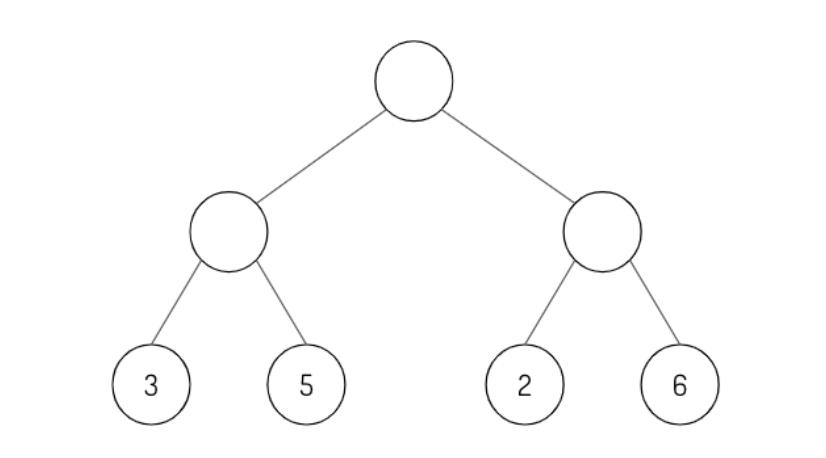

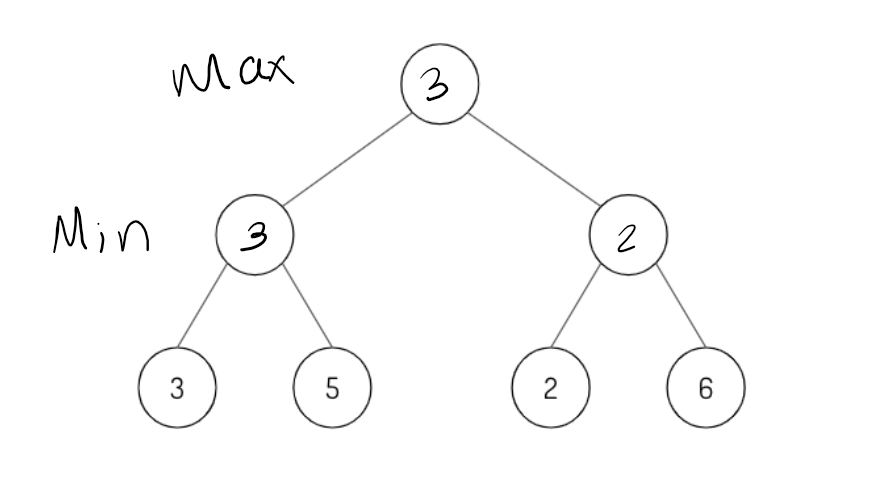

In Minimax the two players are called maximizer and minimizer. The maximizer tries to get the highest score possible while the minimizer tries to do the opposite and get the lowest score possible.

Every board state has a value associated with it. In a given state if the maximizer has upper hand then, the score of the board will tend to be some positive value. If the minimizer has the upper hand in that board state then it will tend to be some negative value. The values of the board are calculated by some heuristics which are unique for every type of game.

Reference - https://www.geeksforgeeks.org/minimax-algorithm-in-game-theory-set-1-introduction/?ref=rp

In [1]:
import math
 
def minimax (curDepth, nodeIndex,
             maxTurn, scores,
             targetDepth):
 
    # base case : targetDepth reached
    if (curDepth == targetDepth):
        return scores[nodeIndex]
     
    if (maxTurn):
        return max(minimax(curDepth + 1, nodeIndex * 2,
                    False, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                    False, scores, targetDepth))
     
    else:
        return min(minimax(curDepth + 1, nodeIndex * 2,
                     True, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                     True, scores, targetDepth))
     
# Driver code
scores = [3, 5, 2, 6]
 
treeDepth = math.log(len(scores), 2)
 
print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))
 
# This code is contributed
# by rootshadow

The optimal value is : 3


**5. Fill in the alpha and beta values as you traverse the minimax tree from left to right.**

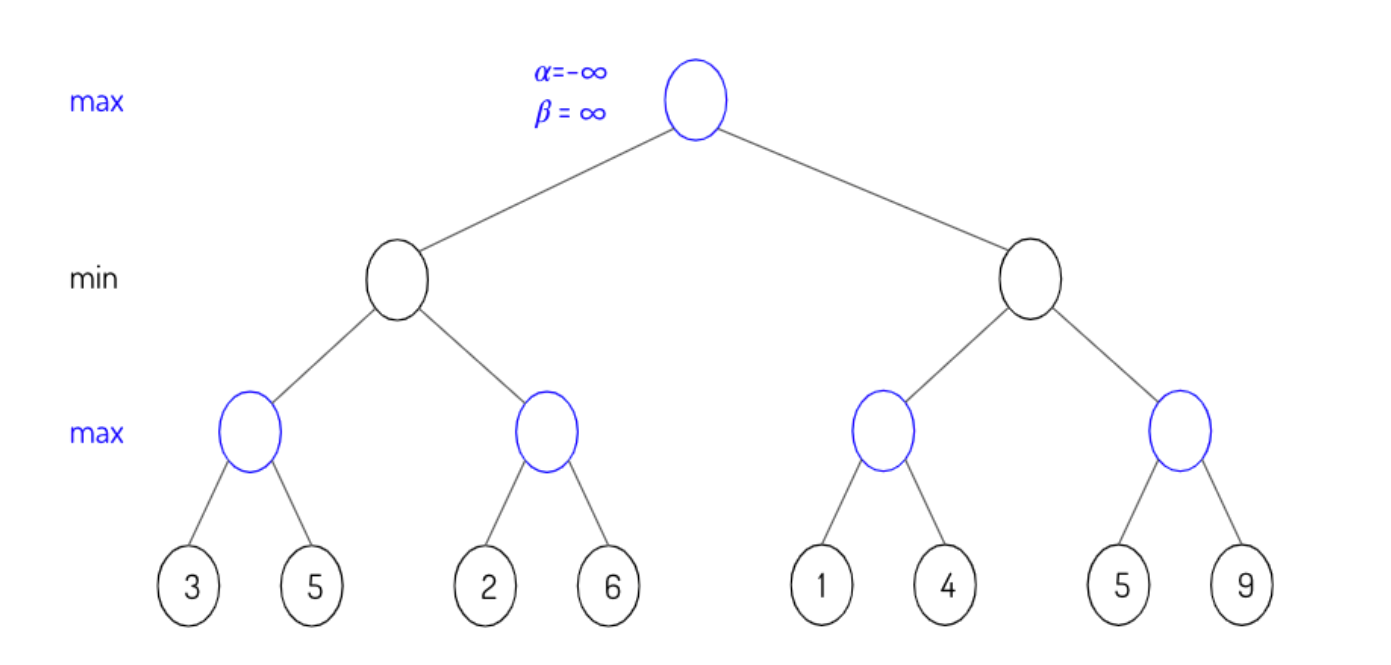

Reference - https://www.geeksforgeeks.org/minimax-algorithm-in-game-theory-set-4-alpha-beta-pruning/

Alpha-Beta pruning is not actually a new algorithm, but rather an optimization technique for the minimax algorithm. It reduces the computation time by a huge factor. This allows us to search much faster and even go into deeper levels in the game tree. It cuts off branches in the game tree which need not be searched because there already exists a better move available. It is called Alpha-Beta pruning because it passes 2 extra parameters in the minimax function, namely alpha and beta.

Let’s define the parameters alpha and beta. 

Alpha is the best value that the maximizer currently can guarantee at that level or above. 

Beta is the best value that the minimizer currently can guarantee at that level or below.

In [2]:
# Initial values of Alpha and Beta
MAX, MIN = 1000, -1000
 
# Returns optimal value for current player
#(Initially called for root and maximizer)
def minimax(depth, nodeIndex, maximizingPlayer,
            values, alpha, beta):
  
    # Terminating condition. i.e
    # leaf node is reached
    if depth == 3:
        return values[nodeIndex]
 
    if maximizingPlayer:
      
        best = MIN
 
        # Recur for left and right children
        for i in range(0, 2):
             
            val = minimax(depth + 1, nodeIndex * 2 + i,
                          False, values, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)
 
            # Alpha Beta Pruning
            if beta <= alpha:
                break
          
        return best
      
    else:
        best = MAX
 
        # Recur for left and
        # right children
        for i in range(0, 2):
          
            val = minimax(depth + 1, nodeIndex * 2 + i,
                            True, values, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)
 
            # Alpha Beta Pruning
            if beta <= alpha:
                break
          
        return best
      
# Driver Code
if __name__ == "__main__":
  
    values = [3, 5, 2, 6, 1, 4, 5, 9] 
    print("The optimal value is :", minimax(0, 0, True, values, MIN, MAX))
     
# This code is contributed by Rituraj Jain

The optimal value is : 5


**6. Given a policy, derive the reward function.**

Given a policy, it is not possible to uniquely derive the reward function. This is because a policy is a mapping from states to actions, whereas a reward function is a mapping from state-action pairs to rewards.
In reinforcement learning, the reward function is typically defined independently of the policy, as it represents the external reward signal that the agent receives for each action it takes. The policy, on the other hand, is designed to maximize the cumulative reward received over time.
	
However, if we know the optimal policy, we can use it to derive an estimate of the reward function. This can be done using the following equation, known as the Bellman equation:
	
Q(s,a) = r(s,a) + γ * Σ p(s',r | s,a) * max[Q(s',a')]
	
Here, Q(s,a) represents the expected cumulative reward of taking action a in state s and following the optimal policy thereafter. r(s,a) represents the immediate reward received for taking action a in state s, p(s',r | s,a) represents the probability of transitioning to state s' and receiving reward r when taking action a in state s, and γ is the discount factor.
	
We can rearrange the Bellman equation to solve for the reward function:
	
r(s,a) = Q(s,a) - γ * Σ p(s',r | s,a) * max[Q(s',a')]
	
Using this equation, we can estimate the reward function for each state-action pair based on the optimal policy. However, this estimate may not be exact, as it relies on the assumption that the policy is optimal and the model of the environment is accurate.


**7. Pros and cons of on-policy vs. off-policy.**

On-policy and off-policy are two different approaches to reinforcement learning, each with its own advantages and disadvantages.
	
On-policy learning refers to learning the value function or policy based on the experiences gathered by following the current policy. In other words, the agent learns about the optimal policy while it is still using that policy to interact with the environment. The most commonly used on-policy algorithms are SARSA and Actor-Critic.
	
Pros of on-policy learning:

• Converges reliably: On-policy algorithms typically converge more reliably than off-policy algorithms because the data used for learning comes from the same policy that is being optimized.

• Handles non-stationary environments: On-policy algorithms can adapt better to non-stationary environments where the optimal policy changes over time.

• Can learn optimal policies for exploration: On-policy algorithms can learn optimal policies that take exploration into account, which is useful in scenarios where exploration is important.

Cons of on-policy learning:

• Slow convergence: On-policy algorithms can converge slower than off-policy algorithms because the data used for learning is suboptimal.

• Exploration-exploitation tradeoff: On-policy algorithms can struggle to balance exploration and exploitation, as they must explore while still following the current policy.
	
Off-policy learning refers to learning the value function or policy based on experiences gathered by following a different policy, which can be a stochastic behavior policy or a deterministic target policy. The most commonly used off-policy algorithms are Q-learning and Deep Q-Networks (DQN).
	
Pros of off-policy learning:

• Faster convergence: Off-policy algorithms can converge faster than on-policy algorithms because they use data from a larger set of policies.

• Can separate exploration and exploitation: Off-policy algorithms can separate exploration and exploitation by using a separate behavior policy for exploration and a target policy for optimization.

• Better sample efficiency: Off-policy algorithms can make better use of data by reusing experiences gathered from a different policy, which improves sample efficiency.

Cons of off-policy learning:

• Can be unstable: Off-policy algorithms can be unstable and prone to divergence if the data distribution is too different from the target distribution.

• Cannot handle non-stationary environments: Off-policy algorithms may struggle to adapt to non-stationary environments where the optimal policy changes over time.

• Difficult to learn optimal policies for exploration: Off-policy algorithms may have difficulty learning optimal policies that balance exploration and exploitation, as they rely on a separate exploration policy.

Overall, the choice between on-policy and off-policy learning depends on the specific characteristics of the problem at hand. On-policy algorithms are better suited for non-stationary environments and scenarios where exploration is important, while off-policy algorithms are more sample-efficient and can converge faster, especially in scenarios with well-defined target policies.

**8. What’s the difference between model-based and model-free? Which one is more data-efficient?**

In reinforcement learning, model-based and model-free are two different approaches to learning, and they differ in how they use information about the environment to make decisions.

Model-based reinforcement learning refers to learning the dynamics of the environment, such as the transition probabilities between states and the rewards associated with each state-action pair. Once the model is learned, the agent can use it to simulate different actions and outcomes and determine the optimal policy. Model-based algorithms include value iteration and policy iteration.

Model-free reinforcement learning, on the other hand, does not learn the dynamics of the environment explicitly. Instead, it directly learns a value function or a policy through trial-and-error interactions with the environment. Model-free algorithms include Q-learning, SARSA, and Deep Q-Networks (DQN).

In terms of data efficiency, model-based reinforcement learning is generally more data-efficient than model-free reinforcement learning. This is because model-based algorithms can use the learned model to plan ahead and make decisions based on simulated outcomes, which can reduce the amount of interaction with the environment needed to find an optimal policy. Model-based algorithms also tend to converge faster, as they make more efficient use of the data.

However, model-based reinforcement learning has several limitations. First, it assumes that the model of the environment is accurate, which may not always be the case. Second, it requires additional computational resources to learn and maintain the model, which can be a challenge for complex environments. Finally, it may not be well-suited for problems where the environment is non-stationary or the optimal policy changes frequently.

In contrast, model-free reinforcement learning is more flexible and can handle a wider range of problems. It does not require an accurate model of the environment and can adapt to changes in the environment more easily. However, model-free algorithms require more data to converge, and the learning process can be slower and less efficient.

Overall, the choice between model-based and model-free reinforcement learning depends on the specific characteristics of the problem at hand. Model-based algorithms are more data-efficient but may be less flexible and more computationally expensive, while model-free algorithms are more flexible but require more data to converge.
